# <center>Searching in scientific papers</center>
##  <center>Patrik Kovács</center>
###  <center>Subject: Information retrieval </center>

#Preprocessing

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Used libraries

In [ ]:
import json
import pandas as pd
import re
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
import nltk
import json
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
%matplotlib inline

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
#downloaded = drive.CreateFile({'id':'1JRSqi4HDhIHXtOBo4P6M30qrX2o-IS2z'}) 
#downloaded.GetContentFile('arxiv-metadata-oai-snapshot.json')

In [ ]:
#df.to_pickle("arxiv_df.p")

In [ ]:
#pickle_file = drive.CreateFile()
#pickle_file.SetContentFile('arxiv_df.p')
#!cp arxiv_df.p "/gdrive/My Drive/ING/VINF/"

In [ ]:
downloaded = drive.CreateFile({'id':'1T5Af-pgZNou18KIUbpbyy75hrD7BId4T'}) 
downloaded.GetContentFile('arxiv_df.p')

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [ ]:
df = pd.read_pickle('arxiv_df.p')

In [ ]:
#df=pd.read_json('arxiv-metadata-oai-snapshot.json',lines = True)

In [ ]:
df.shape

(1765688, 14)

In [ ]:
df.head(2)

,id,submitter,authors,title,comments,journal-ref,doi,report-no,categories,license,abstract,versions,update_date,authors_parsed
0,0704.0001,Pavel Nadolsky,"C. Bal\'azs, E. L. Berger, P. M. Nadolsky, C.-...",Calculation of prompt diphoton production cros...,"37 pages, 15 figures; published version","Phys.Rev.D76:013009,2007",10.1103/PhysRevD.76.013009,ANL-HEP-PR-07-12,hep-ph,None,A fully differential calculation in perturba...,"[{'version': 'v1', 'created': 'Mon, 2 Apr 2007...",2008-11-26,"[[Balázs, C., ], [Berger, E. L., ], [Nadolsky,..."
1,0704.0002,Louis Theran,Ileana Streinu and Louis Theran,Sparsity-certifying Graph Decompositions,To appear in Graphs and Combinatorics,None,None,None,math.CO cs.CG,http://arxiv.org/licenses/nonexclusive-distrib...,"We describe a new algorithm, the $(k,\ell)$-...","[{'version': 'v1', 'created': 'Sat, 31 Mar 200...",2008-12-13,"[[Streinu, Ileana, ], [Theran, Louis, ]]"


In [ ]:
df.columns

Index(['id', 'submitter', 'authors', 'title', 'comments', 'journal-ref', 'doi',
       'report-no', 'categories', 'license', 'abstract', 'versions',
       'update_date', 'authors_parsed'],
      dtype='object')

In [ ]:
df.shape

(1765688, 14)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1765688 entries, 0 to 1765687
Data columns (total 14 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   id              object
 1   submitter       object
 2   authors         object
 3   title           object
 4   comments        object
 5   journal-ref     object
 6   doi             object
 7   report-no       object
 8   categories      object
 9   license         object
 10  abstract        object
 11  versions        object
 12  update_date     object
 13  authors_parsed  object
dtypes: object(14)
memory usage: 188.6+ MB


### Removing of duplicit instances

In [ ]:
df['id'].is_unique

False

In [ ]:
df.duplicated(subset=['id']).any()

True

In [ ]:
df.shape

(1765688, 14)

In [ ]:
df_new=df.drop_duplicates(subset=['id'])

In [ ]:
df_new.shape

(1765685, 14)

# Attribute submitter


In [ ]:
df_new['submitter'].head()

0        Pavel Nadolsky
1          Louis Theran
2           Hongjun Pan
3          David Callan
4    Alberto Torchinsky
Name: submitter, dtype: object

In [ ]:
df_new['submitter'].isnull().sum()

15191

Show top 20 submitters with most publication

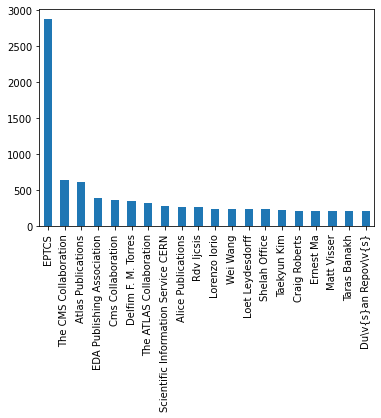

In [ ]:
df_new['submitter'].value_counts()[:20].plot.bar()

# Attribute authors         


In [ ]:
df_new['authors'].head()

0    C. Bal\'azs, E. L. Berger, P. M. Nadolsky, C.-...
1                      Ileana Streinu and Louis Theran
2                                          Hongjun Pan
3                                         David Callan
4             Wael Abu-Shammala and Alberto Torchinsky
Name: authors, dtype: object

In [ ]:
df_new['authors'].isnull().sum()

0

Show top 20 authors with most publication

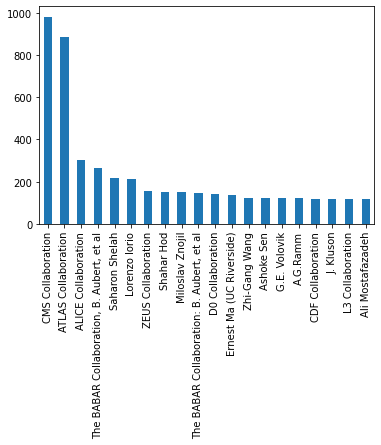

In [ ]:
df_new['authors'].value_counts()[:20].plot.bar()

# Attribute title         



In [ ]:
df_new['title'].head()

0    Calculation of prompt diphoton production cros...
1             Sparsity-certifying Graph Decompositions
2    The evolution of the Earth-Moon system based o...
3    A determinant of Stirling cycle numbers counts...
4    From dyadic $\Lambda_{\alpha}$ to $\Lambda_{\a...
Name: title, dtype: object

In [ ]:
df_new['title'].isnull().sum()

0

# Attribute comments       




In [ ]:
df_new['comments'].head()

0    37 pages, 15 figures; published version
1      To appear in Graphs and Combinatorics
2                        23 pages, 3 figures
3                                   11 pages
4                                       None
Name: comments, dtype: object

In [ ]:
df_new['comments'].tail()

1765683    19 pages, LaTex, 6 PostScript figures; Author'...
1765684    4 pages, LaTeX type, Uses IEEE style files, 60...
1765685    20 pages, LaTeX type, Uses REVTeX style files,...
1765686    7 pages, 4 PostScript Figures, LaTeX, to appea...
1765687    12 pages including 8 eps figs, LaTeX with jpsj...
Name: comments, dtype: object

In [ ]:
df_new['comments'].isnull().sum()

362164

In [ ]:
df[df['comments'].isnull()]['comments'][:2]

4    None
8    None
Name: comments, dtype: object

In [ ]:
#a=df.comments[:15].str.split(',', expand=True)

### Get count of pages and figures with regex

In [ ]:
def GetPageNumber(str):
  try:
    found = re.search('([0-9]+) +[pP]ages?', str).group(1)
  except AttributeError:
    # AAA, ZZZ not found in the original string
    found = 'No data' # apply your error handling
  return found


def GetFigureNumber(str):
  try:
    found = re.search('([0-9]+) +[fF]igures?', str).group(1)
  except AttributeError:
    # AAA, ZZZ not found in the original string
    found = 'No data' # apply your error handling
  return found

In [ ]:
GetPageNumber('To appear in Graphs and Combinatorics')


chyba =  To appear in Graphs and Combinatorics id =  0


'No data'

In [ ]:
GetFigureNumber('6 pages, 4 figures, accepted by PRA')

'4'

In [ ]:
df_new['comments'] = df_new['comments'].astype(str)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df_new['pages']=df_new['comments'].apply(GetPageNumber)
df_new['figures']=df_new['comments'].apply(GetFigureNumber)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
df_new.head(1)

,id,submitter,authors,title,comments,journal-ref,doi,report-no,categories,license,abstract,versions,update_date,authors_parsed,pages,figures
0,0704.0001,Pavel Nadolsky,"C. Bal\'azs, E. L. Berger, P. M. Nadolsky, C.-...",Calculation of prompt diphoton production cros...,"37 pages, 15 figures; published version","Phys.Rev.D76:013009,2007",10.1103/PhysRevD.76.013009,ANL-HEP-PR-07-12,hep-ph,None,A fully differential calculation in perturba...,"[{'version': 'v1', 'created': 'Mon, 2 Apr 2007...",2008-11-26,"[[Balázs, C., ], [Berger, E. L., ], [Nadolsky,...",37,15




# Attribute journal-ref       




In [ ]:
df_new['journal-ref'].head()

0                     Phys.Rev.D76:013009,2007
1                                         None
2                                         None
3                                         None
4    Illinois J. Math. 52 (2008) no.2, 681-689
Name: journal-ref, dtype: object

In [ ]:
df_new['journal-ref'].isnull().sum()

1082361

Show top 20 journals with most publication

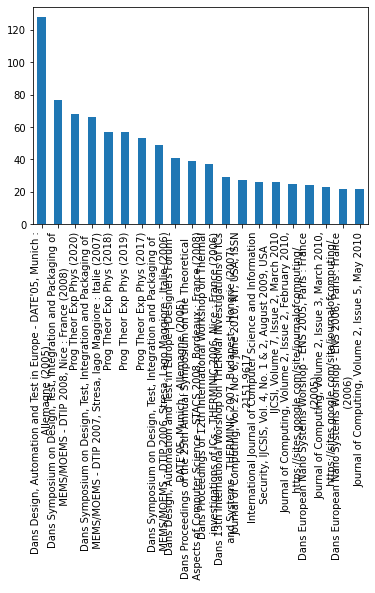

In [ ]:
df_new['journal-ref'].value_counts()[:20].plot.bar()



# Attribute doi       





In [ ]:
df_new['doi'].head()

0    10.1103/PhysRevD.76.013009
1                          None
2                          None
3                          None
4                          None
Name: doi, dtype: object

In [ ]:
df_new['doi'].isnull().sum()

846235

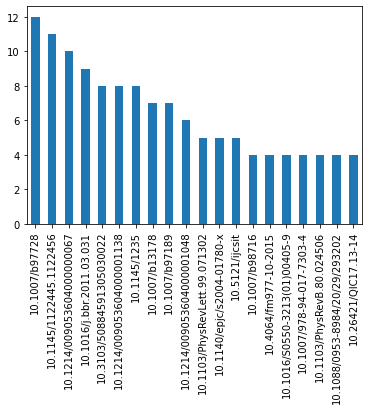

In [ ]:
df_new['doi'].value_counts()[:20].plot.bar()



# Attribute report-no      





In [ ]:
df_new['report-no'].head()

0    ANL-HEP-PR-07-12
1                None
2                None
3                None
4                None
Name: report-no, dtype: object

In [ ]:
df_new['report-no'].isnull().sum()

1603301

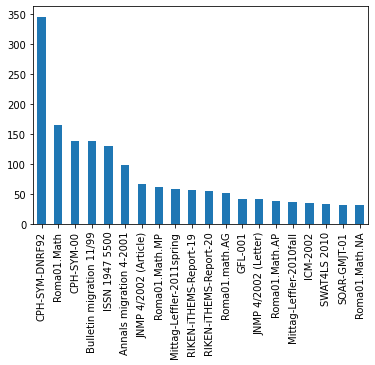

In [ ]:
df_new['report-no'].value_counts()[:20].plot.bar()



# Attribute categories     





Explanation of category abbrevations [ Arxiv category taxonomy](https://arxiv.org/category_taxonomy)

In [ ]:
df_new['categories'].head()

0             hep-ph
1      math.CO cs.CG
2     physics.gen-ph
3            math.CO
4    math.CA math.FA
Name: categories, dtype: object

In [ ]:
df_new['categories'].tail()

1765683    supr-con cond-mat.supr-con
1765684    supr-con cond-mat.supr-con
1765685    supr-con cond-mat.supr-con
1765686    supr-con cond-mat.supr-con
1765687    supr-con cond-mat.supr-con
Name: categories, dtype: object

In [ ]:
df_new['categories'].isnull().sum()

0

Show top 20 categories with most publication

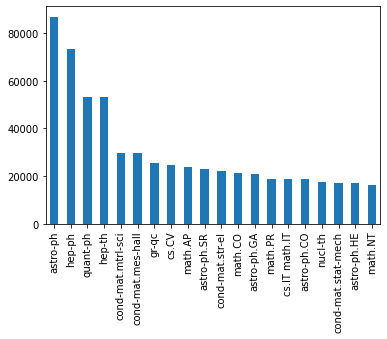

In [ ]:
df_new['categories'].value_counts()[:20].plot.bar()

### Convert category tags to list of strings

In [ ]:
df_new['categories'] = df_new['categories'].apply(lambda x: x.split(' '))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df_new['categories'].head()

0              [hep-ph]
1      [math.CO, cs.CG]
2      [physics.gen-ph]
3             [math.CO]
4    [math.CA, math.FA]
Name: categories, dtype: object



# Attribute license   





In [ ]:
df_new['license'].head()

0                                                 None
1    http://arxiv.org/licenses/nonexclusive-distrib...
2                                                 None
3                                                 None
4                                                 None
Name: license, dtype: object

In [ ]:
df_new['license'].isnull().sum()

452992

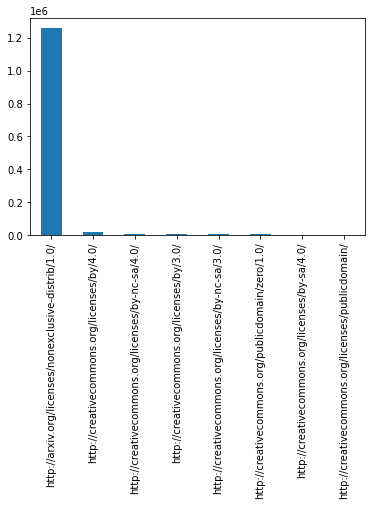

In [ ]:
df_new['license'].value_counts()[:20].plot.bar()



# Attribute abstract   





In [ ]:
df_new['abstract'].head()

0      A fully differential calculation in perturba...
1      We describe a new algorithm, the $(k,\ell)$-...
2      The evolution of Earth-Moon system is descri...
3      We show that a determinant of Stirling cycle...
4      In this paper we show how to compute the $\L...
Name: abstract, dtype: object

In [ ]:
df_new['abstract'].isnull().sum()

0

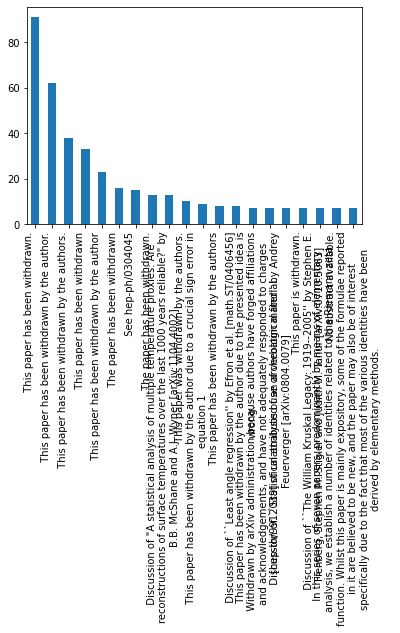

In [ ]:
df_new['abstract'].value_counts()[:20].plot.bar()

In [ ]:
df_new.duplicated(subset=['abstract']).any()

True

In [ ]:
a=df_new['abstract'].value_counts().values>1

In [ ]:
np.sum(a)

1138

In [ ]:
df_new['abstract'].value_counts()[:10].keys

<bound method Series.keys of   This paper has been withdrawn.\n                                                                                                                                                                               91
  This paper has been withdrawn by the author.\n                                                                                                                                                                 62
  This paper has been withdrawn by the authors.\n                                                                                                                                                                38
  This paper has been withdrawn\n                                                                                                                                                                                33
  This paper has been withdrawn by the author\n                                                                            

In [ ]:
df_new[df_new.abstract.str.contains('paper.*withdrawn|^Withdrawn', regex= True, na=False)][:2]

,id,submitter,authors,title,comments,journal-ref,doi,report-no,categories,license,abstract,versions,update_date,authors_parsed
155,0704.0156,Han He,"Han He, Huaning Wang",Nonlinear force-free coronal magnetic field ex...,This paper has been withdrawn by the authors. ...,None,10.1029/2007JA012441,None,astro-ph,None,This paper has been withdrawn by the authors.\n,"[{'version': 'v1', 'created': 'Mon, 2 Apr 2007...",2015-05-13,"[[He, Han, ], [Wang, Huaning, ]]"
373,0704.0374,Igor Kretinin,"Boris A. Zon, Igor Yu. Kretinin",Gravity-induced electric polarization of matte...,This paper has been withdrawn,None,None,None,physics.geo-ph,None,This paper has been withdrawn due to copyrig...,"[{'version': 'v1', 'created': 'Tue, 3 Apr 2007...",2007-05-23,"[[Zon, Boris A., ], [Kretinin, Igor Yu., ]]"


### Deleting rows which contain papers which were withdrawn

In [ ]:
df_new_accepted=df_new[~df_new.abstract.str.contains('[pP]aper.*[wW]ithdrawn|^[Ww]ithdrawn', regex= True, na=False)]

In [ ]:
df_new.shape

(1765685, 16)

In [ ]:
df_new_accepted.shape

(1764241, 16)



# Attribute versions   





In [ ]:
df_new_accepted['versions'].head()

0    [{'version': 'v1', 'created': 'Mon, 2 Apr 2007...
1    [{'version': 'v1', 'created': 'Sat, 31 Mar 200...
2    [{'version': 'v1', 'created': 'Sun, 1 Apr 2007...
3    [{'version': 'v1', 'created': 'Sat, 31 Mar 200...
4    [{'version': 'v1', 'created': 'Mon, 2 Apr 2007...
Name: versions, dtype: object

In [ ]:
df_new_accepted['versions'].tail()

1765683    [{'version': 'v1', 'created': 'Mon, 26 Aug 199...
1765684    [{'version': 'v1', 'created': 'Sat, 31 Aug 199...
1765685    [{'version': 'v1', 'created': 'Tue, 3 Sep 1996...
1765686    [{'version': 'v1', 'created': 'Wed, 18 Sep 199...
1765687    [{'version': 'v1', 'created': 'Wed, 25 Sep 199...
Name: versions, dtype: object

In [ ]:
df_new_accepted['versions'].isnull().sum()

0

In [ ]:
df_new_accepted['versions'][2]

[{'created': 'Sun, 1 Apr 2007 20:46:54 GMT', 'version': 'v1'},
 {'created': 'Sat, 8 Dec 2007 23:47:24 GMT', 'version': 'v2'},
 {'created': 'Sun, 13 Jan 2008 00:36:28 GMT', 'version': 'v3'}]

In [ ]:
df_new_accepted['update_date'][2]

'2008-01-13'

### Get the last version date and version number

In [ ]:
df_new_accepted['latest_version_date'] = df_new_accepted['versions'].apply(lambda x: x[-1]['created'])
df_new_accepted['latest_version'] = df_new_accepted['versions'].apply(lambda x: x[-1]['version'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
df_new_accepted.head(2)

,id,submitter,authors,title,comments,journal-ref,doi,report-no,categories,license,abstract,versions,update_date,authors_parsed,pages,figures,latest_version_date,latest_version
0,0704.0001,Pavel Nadolsky,"C. Bal\'azs, E. L. Berger, P. M. Nadolsky, C.-...",Calculation of prompt diphoton production cros...,"37 pages, 15 figures; published version","Phys.Rev.D76:013009,2007",10.1103/PhysRevD.76.013009,ANL-HEP-PR-07-12,[hep-ph],None,A fully differential calculation in perturba...,"[{'version': 'v1', 'created': 'Mon, 2 Apr 2007...",2008-11-26,"[[Balázs, C., ], [Berger, E. L., ], [Nadolsky,...",37,15,"Tue, 24 Jul 2007 20:10:27 GMT",v2
1,0704.0002,Louis Theran,Ileana Streinu and Louis Theran,Sparsity-certifying Graph Decompositions,To appear in Graphs and Combinatorics,None,None,None,"[math.CO, cs.CG]",http://arxiv.org/licenses/nonexclusive-distrib...,"We describe a new algorithm, the $(k,\ell)$-...","[{'version': 'v1', 'created': 'Sat, 31 Mar 200...",2008-12-13,"[[Streinu, Ileana, ], [Theran, Louis, ]]",No data,No data,"Sat, 13 Dec 2008 17:26:00 GMT",v2


### Convert latest_version_date to date

In [ ]:
df_new_accepted['latest_version_date']=pd.to_datetime(df_new_accepted.latest_version_date)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Show 5 most fresh articles

In [ ]:
df_new_accepted.sort_values(by='latest_version_date',ascending=False)[:5]

,id,submitter,authors,title,comments,journal-ref,doi,report-no,categories,license,abstract,versions,update_date,authors_parsed,pages,figures,latest_version_date,latest_version
1351571,2009.10068,Bin Liu,"Bin Liu, Dong Lai",Hierarchical Black-Hole Mergers in Multiple Sy...,"18 pages, 20 figures. Submitted",None,None,None,"[astro-ph.HE, gr-qc]",http://arxiv.org/licenses/nonexclusive-distrib...,The merging black-hole (BH) binaries GW19041...,"[{'version': 'v1', 'created': 'Mon, 21 Sep 202...",2020-09-22,"[[Liu, Bin, ], [Lai, Dong, ]]",18,20,2020-09-21 17:59:59+00:00,v1
1351570,2009.10067,Pol Gurri,"Pol Gurri, Edward N. Taylor and Christopher J....",The first shear measurements from precision we...,None,None,10.1093/mnras/staa2893,None,[astro-ph.GA],http://arxiv.org/licenses/nonexclusive-distrib...,We present an end-to-end methodology to meas...,"[{'version': 'v1', 'created': 'Mon, 21 Sep 202...",2020-09-22,"[[Gurri, Pol, ], [Taylor, Edward N., ], [Fluke...",No data,No data,2020-09-21 17:59:58+00:00,v1
1351569,2009.10066,Dongdong Chen,Dengpan Fu and Bo Xin and Jingdong Wang and Do...,Improving Person Re-identification with Iterat...,Accepted by Transactions on Image Processing,None,None,None,[cs.CV],http://arxiv.org/licenses/nonexclusive-distrib...,Our impression about one person often update...,"[{'version': 'v1', 'created': 'Mon, 21 Sep 202...",2020-09-22,"[[Fu, Dengpan, ], [Xin, Bo, ], [Wang, Jingdong...",No data,No data,2020-09-21 17:59:04+00:00,v1
1351568,2009.10065,Firuz Kamalov,Firuz Kamalov and Ikhlaas Gurrib,Machine learning based forecasting of signific...,None,None,None,None,"[cs.LG, stat.ML]",http://arxiv.org/licenses/nonexclusive-distrib...,Asset value forecasting has always attracted...,"[{'version': 'v1', 'created': 'Mon, 21 Sep 202...",2020-09-22,"[[Kamalov, Firuz, ], [Gurrib, Ikhlaas, ]]",No data,No data,2020-09-21 17:56:42+00:00,v1
1166742,1908.08572,Ryan Rossi,"Ryan A. Rossi, Di Jin, Sungchul Kim, Nesreen K...",On Proximity and Structural Role-based Embeddi...,None,ACM Transactions on Knowledge Discovery from D...,10.1145/3397191,None,"[cs.SI, cs.LG]",http://arxiv.org/licenses/nonexclusive-distrib...,Structural roles define sets of structurally...,"[{'version': 'v1', 'created': 'Thu, 22 Aug 201...",2020-09-22,"[[Rossi, Ryan A., ], [Jin, Di, ], [Kim, Sungch...",No data,No data,2020-09-21 17:56:04+00:00,v2


Show top 20 version number with highest articles

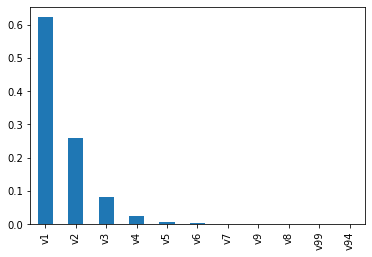

In [ ]:
df_new_accepted['latest_version'].value_counts(normalize=True)[:20].plot.bar()



# Attribute update_date   





In [ ]:
df_new_accepted['update_date'].head()

0    2008-11-26
1    2008-12-13
2    2008-01-13
3    2007-05-23
4    2013-10-15
Name: update_date, dtype: object

In [ ]:
df_new_accepted['update_date'].tail()

1765683    2009-10-30
1765684    2016-11-18
1765685    2009-10-30
1765686    2009-10-30
1765687    2009-10-30
Name: update_date, dtype: object

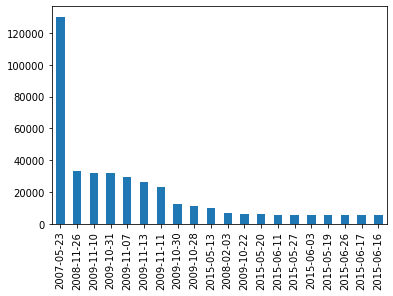

In [ ]:
df_new_accepted['update_date'].value_counts()[:20].plot.bar()

### Convert update date to date

In [ ]:
df_new_accepted['update_date']=pd.to_datetime(df_new_accepted.update_date)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Show 5 most fres articles

In [ ]:
df_new_accepted.iloc[1351496,:]['update_date']

Timestamp('2008-02-03 00:00:00')

In [ ]:
df_new_accepted.iloc[1351496,:]['versions']

[{'created': 'Fri, 3 Dec 1993 15:24:56 GMT', 'version': 'v1'}]

In [ ]:
df_new_accepted.sort_values(by='update_date',ascending=False)[:2]

,id,submitter,authors,title,comments,journal-ref,doi,report-no,categories,license,abstract,versions,update_date,authors_parsed
1351496,2009.09993,Luca Arnaboldi `,Artur Sokolovsky and Luca Arnaboldi,Machine Learning Classification of Price Extre...,Associated processing files are available at:\...,None,None,None,q-fin.TR cs.LG,http://creativecommons.org/licenses/by/4.0/,The study introduces an automated trading sy...,"[{'version': 'v1', 'created': 'Mon, 21 Sep 202...",2020-09-22,"[[Sokolovsky, Artur, ], [Arnaboldi, Luca, ]]"
1350724,2009.09221,Tom Meyerovitch,Jeremias Epperlein and Tom Meyerovitch,"Iterated Minkowski sums, horoballs and north-s...","41 pages, 8 figures",None,None,None,math.DS,http://arxiv.org/licenses/nonexclusive-distrib...,Given a finite generating set $A$ for a grou...,"[{'version': 'v1', 'created': 'Sat, 19 Sep 202...",2020-09-22,"[[Epperlein, Jeremias, ], [Meyerovitch, Tom, ]]"




# Attribute authors_parsed





In [ ]:
df_new_accepted['authors_parsed'].head()

0    [[Balázs, C., ], [Berger, E. L., ], [Nadolsky,...
1             [[Streinu, Ileana, ], [Theran, Louis, ]]
2                                   [[Pan, Hongjun, ]]
3                                  [[Callan, David, ]]
4    [[Abu-Shammala, Wael, ], [Torchinsky, Alberto, ]]
Name: authors_parsed, dtype: object

In [ ]:
df_new_accepted['authors_parsed'].isnull().sum()

0

In [ ]:
df_new_accepted['authors_parsed'][0]

[['Balázs', 'C.', ''],
 ['Berger', 'E. L.', ''],
 ['Nadolsky', 'P. M.', ''],
 ['Yuan', 'C. -P.', '']]

In [ ]:
ret=list(map(' '.join, df_new_accepted['authors_parsed'][0]))
result = list(map(str.strip, ret))

In [ ]:
result

['Balázs C.', 'Berger E. L.', 'Nadolsky P. M.', 'Yuan C. -P.']

### Convert authors to list of strings

In [ ]:
def ConvertAuthors(authors):
  res=list(map(' '.join, authors))
  return list(map(str.strip, res))


In [ ]:
df_new_accepted['list_of_authors']=df_new_accepted['authors_parsed'].apply(ConvertAuthors)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df_new_accepted.head(2)

,id,submitter,authors,title,comments,journal-ref,doi,report-no,categories,license,abstract,versions,update_date,authors_parsed,pages,figures,latest_version_date,latest_version,list_of_authors
0,0704.0001,Pavel Nadolsky,"C. Bal\'azs, E. L. Berger, P. M. Nadolsky, C.-...",Calculation of prompt diphoton production cros...,"37 pages, 15 figures; published version","Phys.Rev.D76:013009,2007",10.1103/PhysRevD.76.013009,ANL-HEP-PR-07-12,[hep-ph],None,A fully differential calculation in perturba...,"[{'version': 'v1', 'created': 'Mon, 2 Apr 2007...",2008-11-26,"[[Balázs, C., ], [Berger, E. L., ], [Nadolsky,...",37,15,"Tue, 24 Jul 2007 20:10:27 GMT",v2,"[Balázs C., Berger E. L., Nadolsky P. M., Yuan..."
1,0704.0002,Louis Theran,Ileana Streinu and Louis Theran,Sparsity-certifying Graph Decompositions,To appear in Graphs and Combinatorics,None,None,None,"[math.CO, cs.CG]",http://arxiv.org/licenses/nonexclusive-distrib...,"We describe a new algorithm, the $(k,\ell)$-...","[{'version': 'v1', 'created': 'Sat, 31 Mar 200...",2008-12-13,"[[Streinu, Ileana, ], [Theran, Louis, ]]",No data,No data,"Sat, 13 Dec 2008 17:26:00 GMT",v2,"[Streinu Ileana, Theran Louis]"


#Save final dataset for searching

### Removing unused attributes

In [ ]:
df_new_accepted.columns

Index(['id', 'submitter', 'authors', 'title', 'comments', 'journal-ref', 'doi',
       'report-no', 'categories', 'license', 'abstract', 'versions',
       'update_date', 'authors_parsed', 'pages', 'figures',
       'latest_version_date', 'latest_version', 'list_of_authors'],
      dtype='object')

In [ ]:
df_new_accepted_final=df_new_accepted.drop(columns=['authors', 'comments','versions','update_date','authors_parsed'])

In [ ]:
df_new_accepted_final.shape

(1764241, 14)

In [ ]:
df_new_accepted_final.columns

Index(['id', 'submitter', 'title', 'journal-ref', 'doi', 'report-no',
       'categories', 'license', 'abstract', 'pages', 'figures',
       'latest_version_date', 'latest_version', 'list_of_authors'],
      dtype='object')

In [ ]:
#df_new_accepted_final.to_pickle("df_almost_final.p")

In [ ]:
df_new_accepted_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1764241 entries, 0 to 1765687
Data columns (total 14 columns):
 #   Column               Dtype 
---  ------               ----- 
 0   id                   object
 1   submitter            object
 2   title                object
 3   journal-ref          object
 4   doi                  object
 5   report-no            object
 6   categories           object
 7   license              object
 8   abstract             object
 9   pages                object
 10  figures              object
 11  latest_version_date  object
 12  latest_version       object
 13  list_of_authors      object
dtypes: object(14)
memory usage: 201.9+ MB


In [ ]:
#pickle_file = drive.CreateFile()
#pickle_file.SetContentFile('df_almost_final.p')
#!cp df_almost_final.p "/gdrive/My Drive/ING/VINF/"

### Replace None values with string No data

In [ ]:
columns=['submitter', 'pages','figures',  'journal-ref','doi', 'report-no' , 'license']

In [ ]:
df_new_accepted_final[columns] = df_new_accepted_final[columns].fillna(value='No data')

In [ ]:
df_new_accepted_final.head(2)

,id,submitter,title,journal-ref,doi,report-no,categories,license,abstract,pages,figures,latest_version_date,latest_version,list_of_authors
0,0704.0001,Pavel Nadolsky,Calculation of prompt diphoton production cros...,"Phys.Rev.D76:013009,2007",10.1103/PhysRevD.76.013009,ANL-HEP-PR-07-12,[hep-ph],No data,A fully differential calculation in perturba...,37,15,"Tue, 24 Jul 2007 20:10:27 GMT",v2,"[Balázs C., Berger E. L., Nadolsky P. M., Yuan..."
1,0704.0002,Louis Theran,Sparsity-certifying Graph Decompositions,No data,No data,No data,"[math.CO, cs.CG]",http://arxiv.org/licenses/nonexclusive-distrib...,"We describe a new algorithm, the $(k,\ell)$-...",No data,No data,"Sat, 13 Dec 2008 17:26:00 GMT",v2,"[Streinu Ileana, Theran Louis]"


In [ ]:
df_new_accepted_final.to_pickle("df_final.p")

In [ ]:
pickle_file = drive.CreateFile()
pickle_file.SetContentFile('df_final.p')
!cp df_final.p "/gdrive/My Drive/ING/VINF/"

# Final dataset

In [ ]:
downloaded = drive.CreateFile({'id':'1--gifVVEjbKkcMKXLPhfTsWIQbRF1Obq'}) 
downloaded.GetContentFile('df_final.p')

In [ ]:
df = pd.read_pickle('df_final.p')

In [ ]:
df.shape

(1764241, 14)

In [ ]:
df.head(2)

,id,submitter,title,journal-ref,doi,report-no,categories,license,abstract,pages,figures,latest_version_date,latest_version,list_of_authors
0,0704.0001,Pavel Nadolsky,Calculation of prompt diphoton production cros...,"Phys.Rev.D76:013009,2007",10.1103/PhysRevD.76.013009,ANL-HEP-PR-07-12,[hep-ph],No data,A fully differential calculation in perturba...,37,15,"Tue, 24 Jul 2007 20:10:27 GMT",v2,"[Balázs C., Berger E. L., Nadolsky P. M., Yuan..."
1,0704.0002,Louis Theran,Sparsity-certifying Graph Decompositions,No data,No data,No data,"[math.CO, cs.CG]",http://arxiv.org/licenses/nonexclusive-distrib...,"We describe a new algorithm, the $(k,\ell)$-...",No data,No data,"Sat, 13 Dec 2008 17:26:00 GMT",v2,"[Streinu Ileana, Theran Louis]"


## Convert page and figure numbers to int

In [ ]:
test_df=df[:100]

In [ ]:
def PageToInt(page):
  if(page !='No data' and page !=''):
      return int(page)


def FigureToInt(figure):
  if(figure !='No data' and figure !=''):
      return int(figure)


In [ ]:
test_df['pages']=test_df['pages'].apply(PageToInt)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
test_df['figures']=test_df['figures'].apply(FigureToInt)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


## Convert categories to list of strings

In [ ]:
test_df['categories'] = test_df['categories'].astype(str)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


## Convert list of authors to list of strings

In [ ]:
test_df['list_of_authors'] = test_df['list_of_authors'].astype(str)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


## Convert abstract to vector representation


## TF-IDF vectorization

In [ ]:
def remove_stopwords(text):
    no_stopword_text = [w for w in text.split() if not w in stop_words]
    return ' '.join(no_stopword_text)

def clean_text(text):
    # remove backslash-apostrophe 
    text = re.sub("\'", "", text) 
    # remove everything except alphabets and numbers
    text = re.sub("[^a-zA-Z0-9]"," ",text) 
    # remove whitespaces 
    text = ' '.join(text.split()) 
    # convert text to lowercase 
    text = text.lower() 
    
    return text

In [ ]:
test_df['abstract']= test_df['abstract'].apply(clean_text)
test_df['abstract']= test_df['abstract'].apply(remove_stopwords)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
TF_IDF=TfidfVectorizer(max_df=0.8, max_features=512)

In [ ]:
test_df['abstract']=TF_IDF.fit_transform(test_df['abstract'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
def formatToArray(arr):
  vec=arr[0].toarray()
  return str(np.array(vec[0]).tolist())

In [ ]:
test_df['abstract']=test_df['abstract'].apply(formatToArray)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


## Universal sentence encoder

In [ ]:
%pip install tensorflow==2.3.1
%pip install tensorflow-hub==0.9.0

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub

In [ ]:
module_url = "https://tfhub.dev/google/universal-sentence-encoder/4" 
model = hub.load(module_url)
print ("module %s loaded" % module_url)

module https://tfhub.dev/google/universal-sentence-encoder/4 loaded


In [ ]:
test_df['abstract']= test_df['abstract'].apply(clean_text)
test_df['abstract']= test_df['abstract'].apply(remove_stopwords)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
test_df['abstract']=model(test_df['abstract'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
def formatSentenceEncoderResultToArray(arr):
  return str(np.array(arr).tolist())

In [ ]:
test_df['abstract']=test_df['abstract'].apply(formatSentenceEncoderResultToArray)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
#df.to_json(orient='records',path_or_buf='df_json.json')

In [ ]:
test_df.head()

## Save to json

In [ ]:
test_df.to_json(orient='records',path_or_buf='df_json_small_use.json')

In [ ]:
#json_file = drive.CreateFile()
#json_file.SetContentFile('df_json.json')
#!cp df_json.json "/gdrive/My Drive/ING/VINF/"

In [ ]:
downloaded = drive.CreateFile({'id':'1QI6KvNbHq6VZ8FxRRw3AEhhmmpWKTFcB'}) 
downloaded.GetContentFile('df_json.json')

In [ ]:
with open('df_json.json', 'r') as f:

  data_json = json.load(f)